In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_file = "dataset/train.csv"
test_file = "dataset/test.csv"

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
passengerid = test.PassengerId

def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round(df.isnull().sum().sort_values(
        ascending=False)/len(df)*100, 2)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


missing_percentage(train)



,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [99]:
missing_percentage(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [100]:
missing_percentage(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


In [101]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(
        round(df.loc[:, feature].value_counts(dropna=False, normalize=True)*100, 2))
    # creating a df with th
    total = pd.DataFrame(df.loc[:, feature].value_counts(dropna=False))
    # concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis=1)

In [102]:
percent_value_counts(train, 'Embarked')

,Total,Percent
Embarked,,
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [103]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\336238047.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


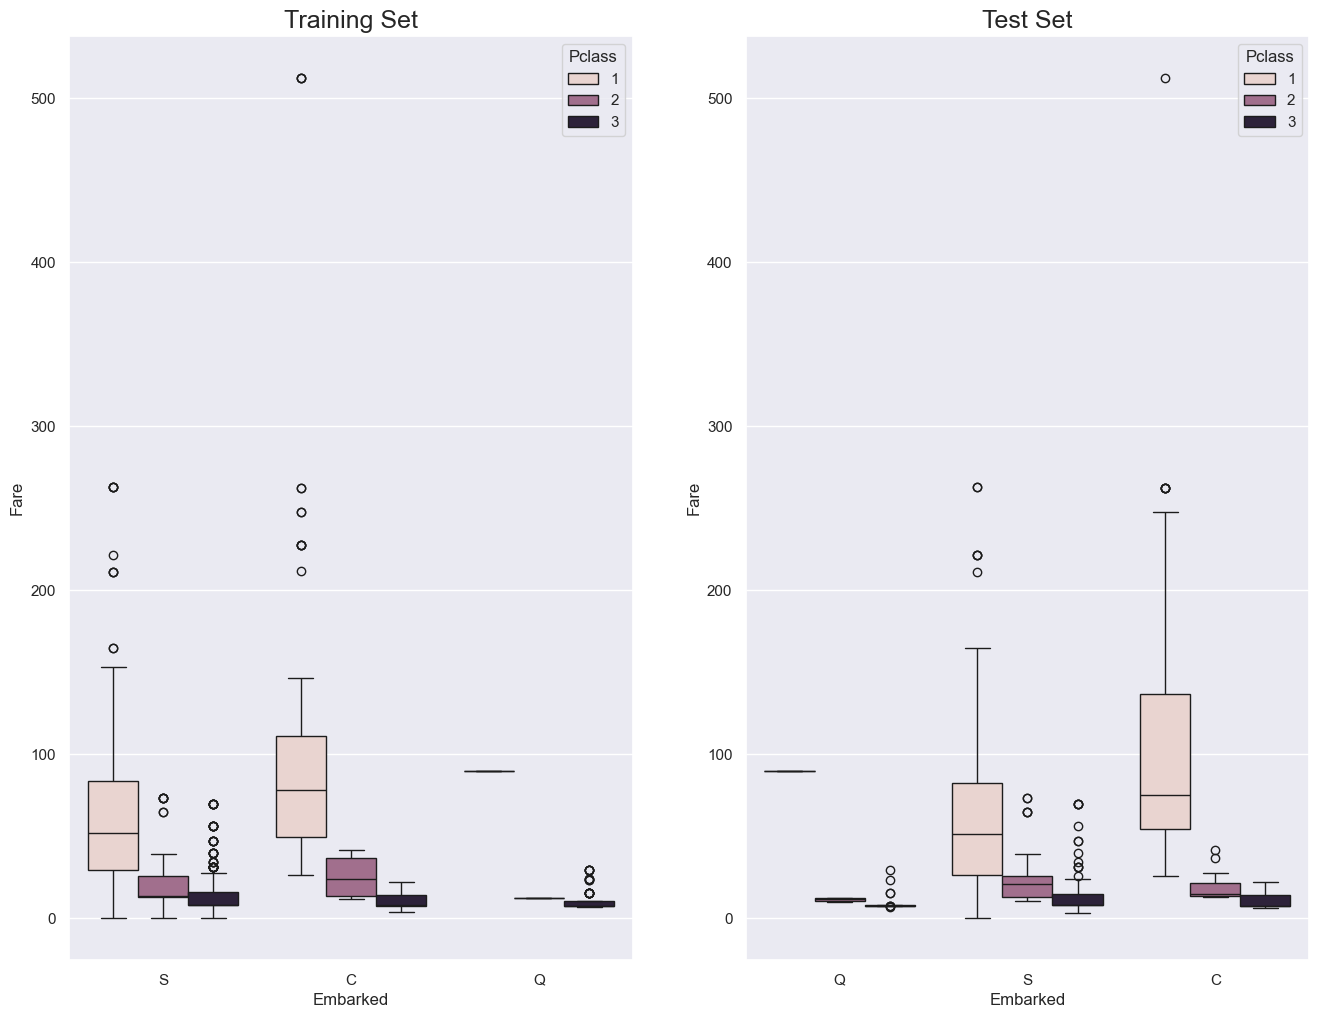

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)


# ## Fixing legends
# leg_1 = ax1.get_legend()
# leg_1.set_title("PClass")
# legs = leg_1.texts
# legs[0].set_text('Upper')
# legs[1].set_text('Middle')
# legs[2].set_text('Lower')

fig.show()

In [105]:
print("Train Cabin missing: " + str(train.Cabin.isnull().sum()/len(train.Cabin)))
print("Test Cabin missing: " + str(test.Cabin.isnull().sum()/len(test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


In [106]:
## Concat train and test into a variable "all_data"
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=False)

## Assign all the null values to N
all_data.fillna({'Cabin': 'N'}, inplace=True)

In [107]:
print(survivers)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [108]:
train.fillna({"Embarked": "C"}, inplace=True)

In [109]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [110]:
percent_value_counts(all_data, "Cabin")

,Total,Percent
Cabin,,
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [111]:
all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [112]:
def cabin_estimator(i):
    """Grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

In [113]:
with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

In [114]:
##applying cabin estimator function. 
with_N.loc[:, 'Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

## getting back train. 
all_data = pd.concat([with_N, without_N], axis=0)

## PassengerId helps us separate train and test. 
all_data.sort_values(by = 'PassengerId', inplace=True)

# Separating train and test from all_data.
train = all_data[:891].copy()

test = all_data[891:]

# adding saved target variable with train.
train.loc[:, 'Survived'] = survivers

In [115]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [116]:
missing_value = test[(test.Pclass == 3) & 
                     (test.Embarked == "S") & 
                     (test.Sex == "male")].Fare.mean()

In [117]:
# test.Fare.fillna(missing_value, inplace=True)
train.fillna({"Fare": missing_value}, inplace=True)

In [118]:
print ("Train age missing value: " + str((train.Age.isnull().sum()/len(train))*100)+str("%"))
print ("Test age missing value: " + str((test.Age.isnull().sum()/len(test))*100)+str("%"))

Train age missing value: 19.865319865319865%
Test age missing value: 20.574162679425836%


C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\4205486872.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "Sex",


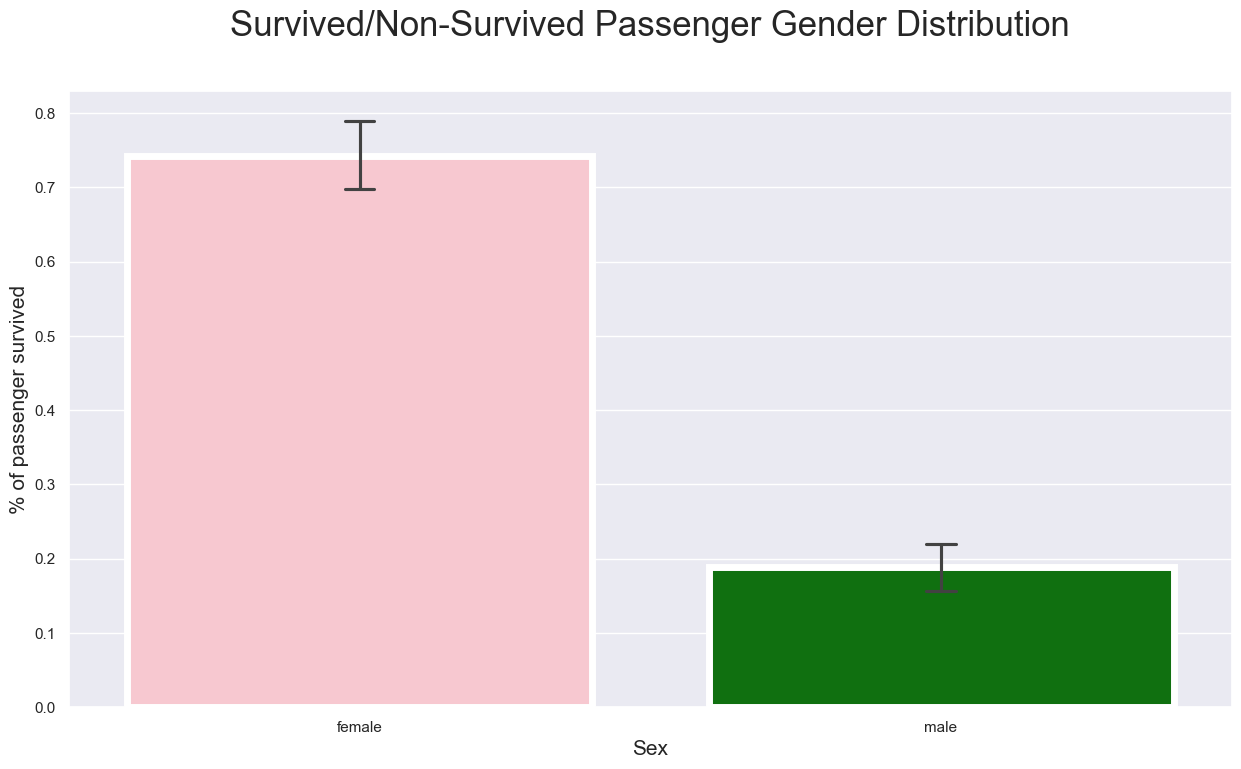

In [119]:
import seaborn as sns
pal = {'male':"green", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data=train, 
                 palette = pal,
                 linewidth=5,
                 order = ['female','male'],
                 capsize = .05,

                )

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);

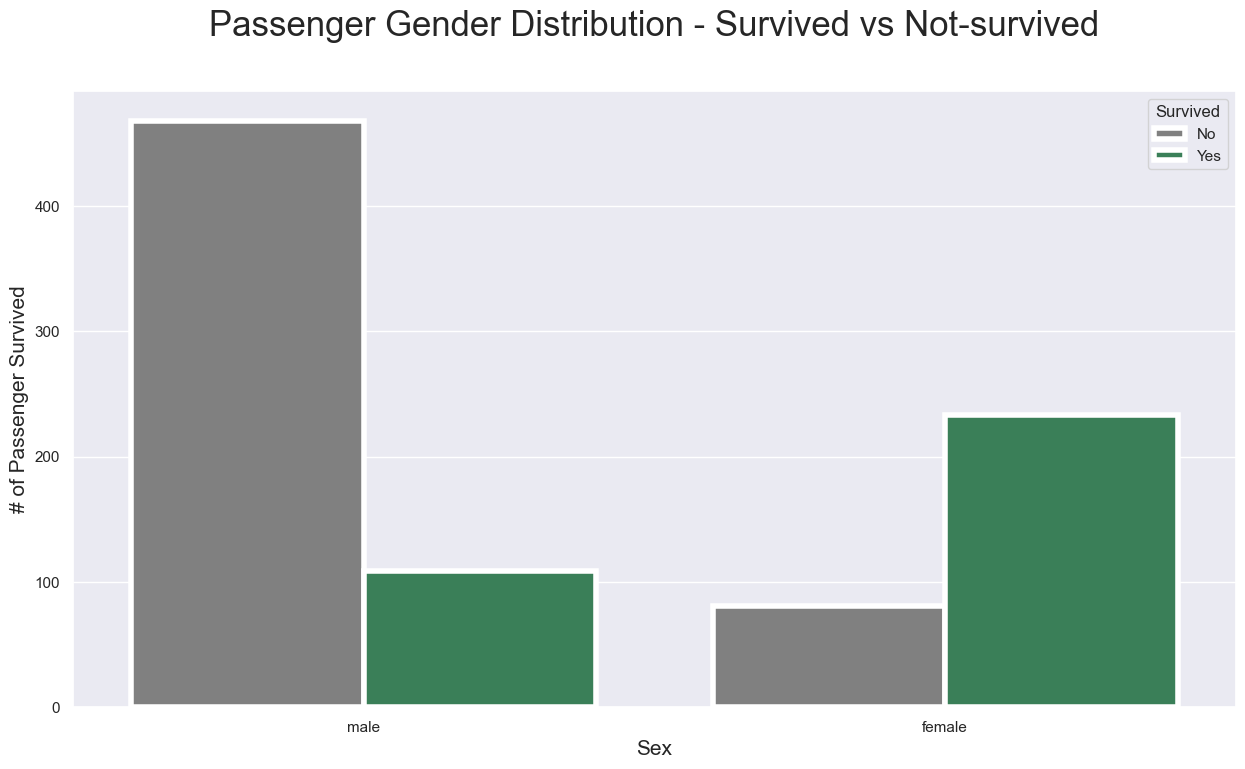

In [120]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=4, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25, pad=40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

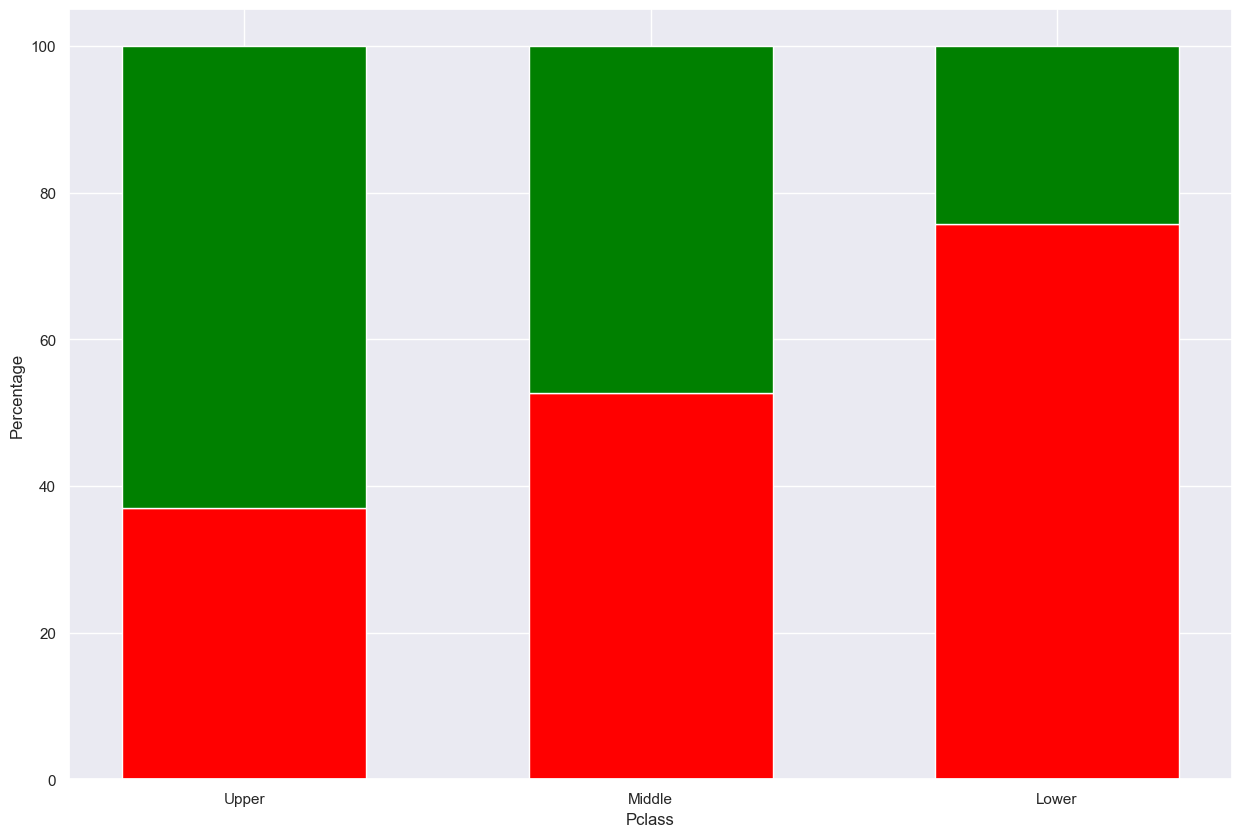

In [121]:
temp = train[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count().reset_index()
temp_df = pd.pivot_table(temp, values = 'PassengerId', index = 'Pclass',columns = 'Survived')
names = ['No', 'Yes']
temp_df.columns = names
r = [0,1,2]
totals = [i+j for i, j in zip(temp_df['No'], temp_df['Yes'])]
No_s = [i / j * 100 for i,j in zip(temp_df['No'], totals)]
Yes_s = [i / j * 100 for i,j in zip(temp_df['Yes'], totals)]
## Plotting
plt.subplots(figsize = (15,10))
barWidth = 0.60
names = ('Upper', 'Middle', 'Lower')
# Create green Bars
plt.bar(r, No_s, color='Red', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, Yes_s, bottom=No_s, color='Green', edgecolor='white', width=barWidth)

 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Pclass")
plt.ylabel('Percentage')
 
# Show graphic
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\872679919.py:2: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'blue'}` instead.

  sns.barplot(x = "Pclass",
C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\872679919.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 3}` instead.

  sns.barplot(x = "Pclass",


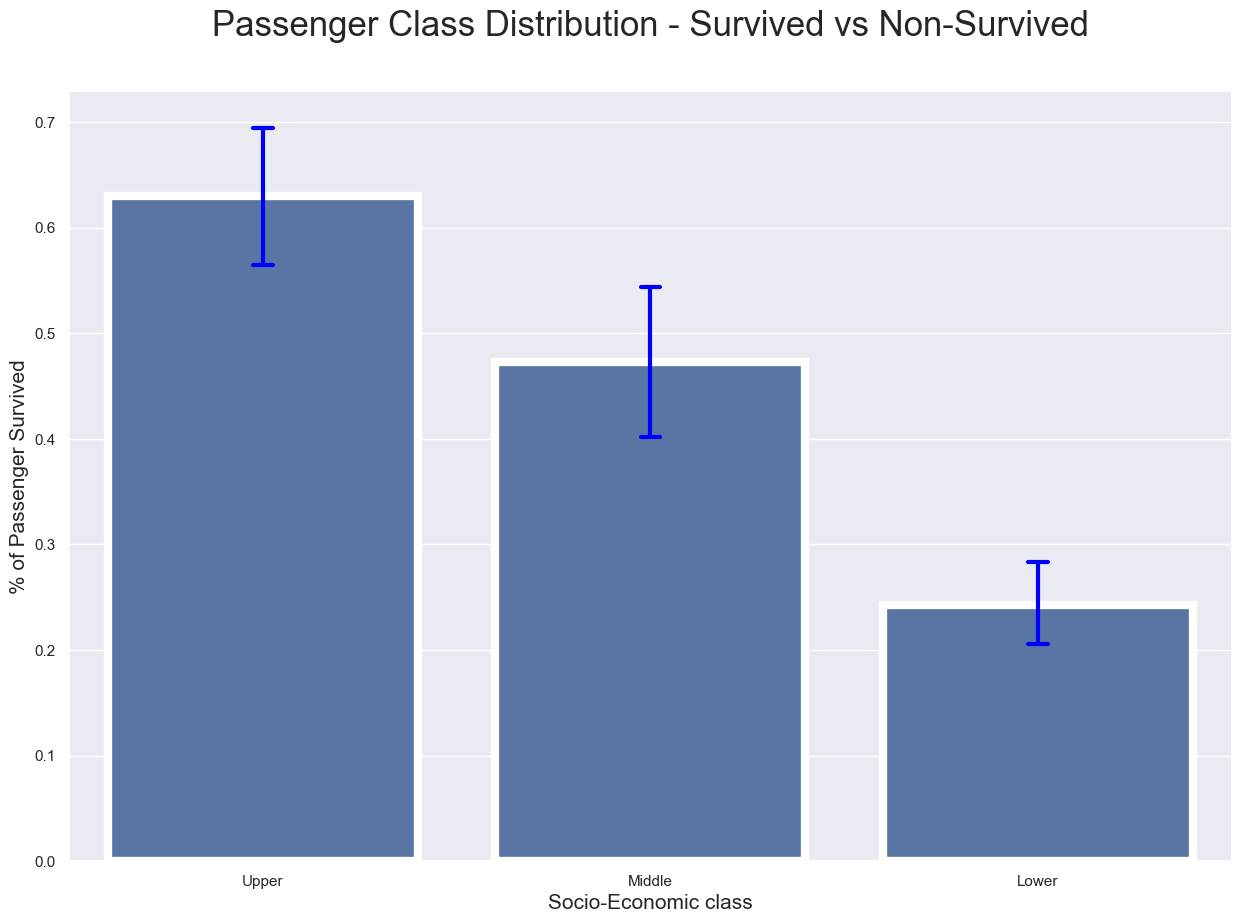

In [122]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=6,
            capsize = .05,
            errcolor='blue',
            errwidth = 3
            

           )
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
names = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, names);

C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\3037946826.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.Pclass[train.Survived == 0] ,
C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\3037946826.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] ,


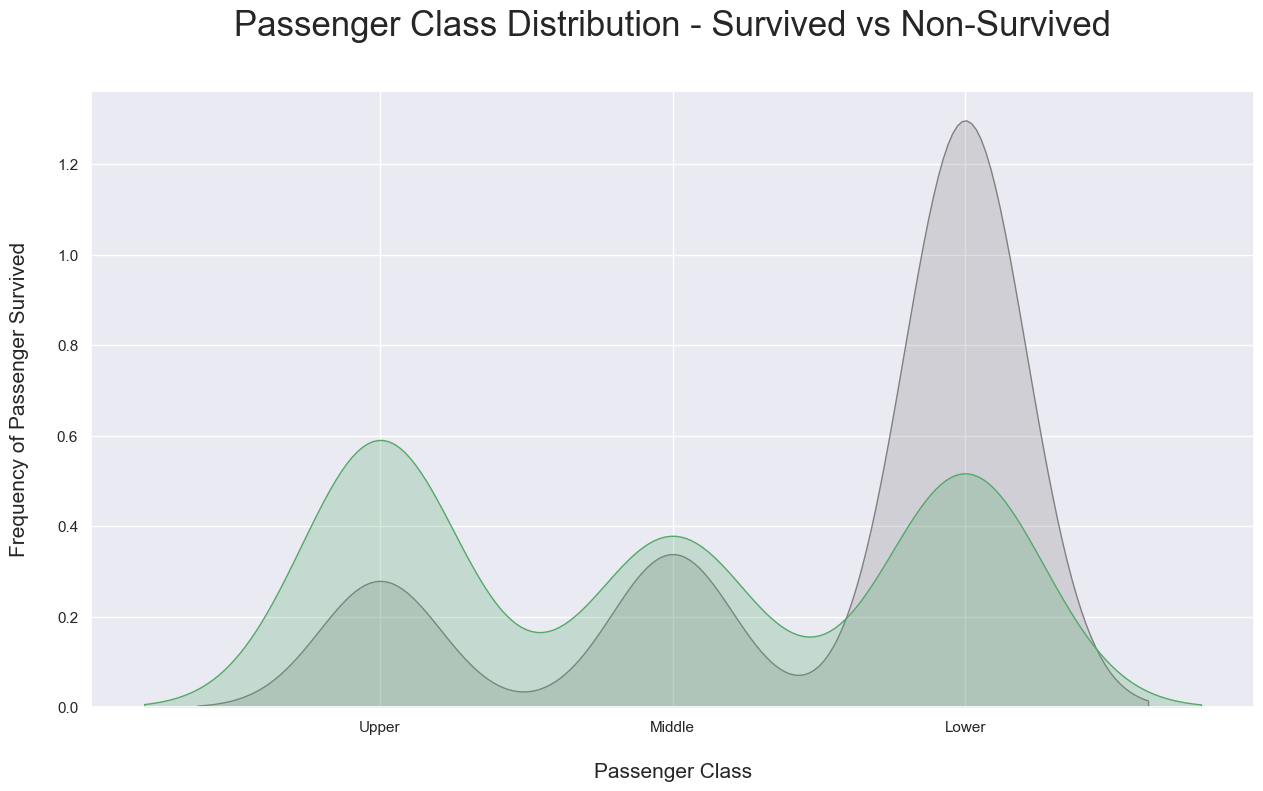

In [123]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\2349483930.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\2349483930.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')


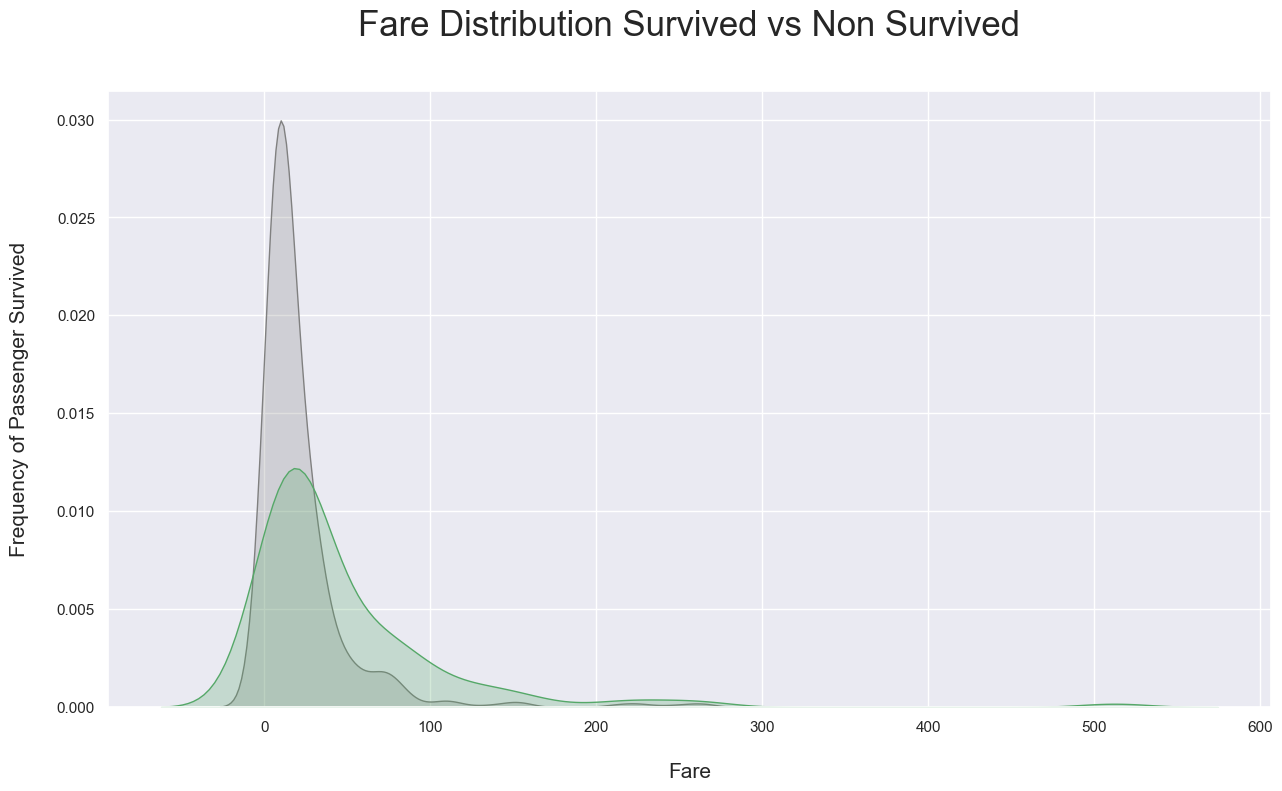

In [124]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

In [125]:
train[train.Fare > 280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\3339944010.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\3339944010.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')


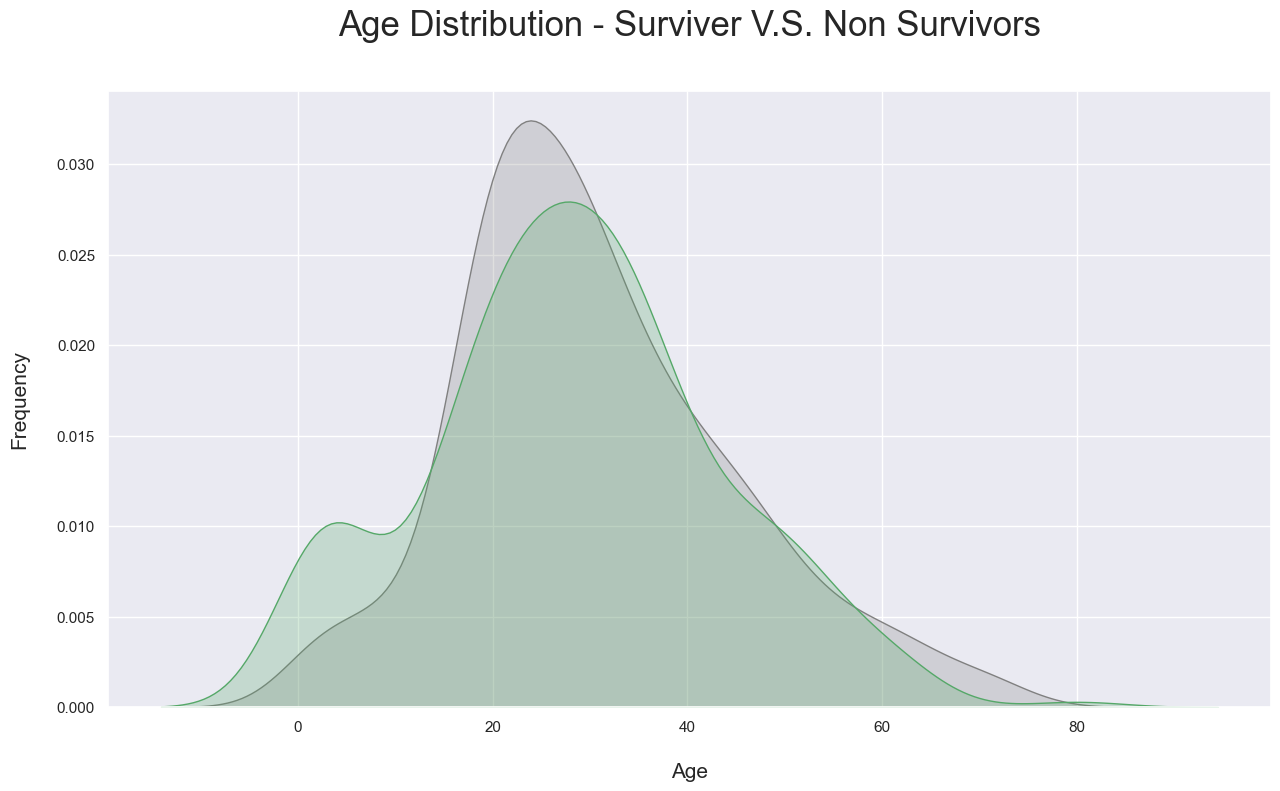

In [126]:

# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

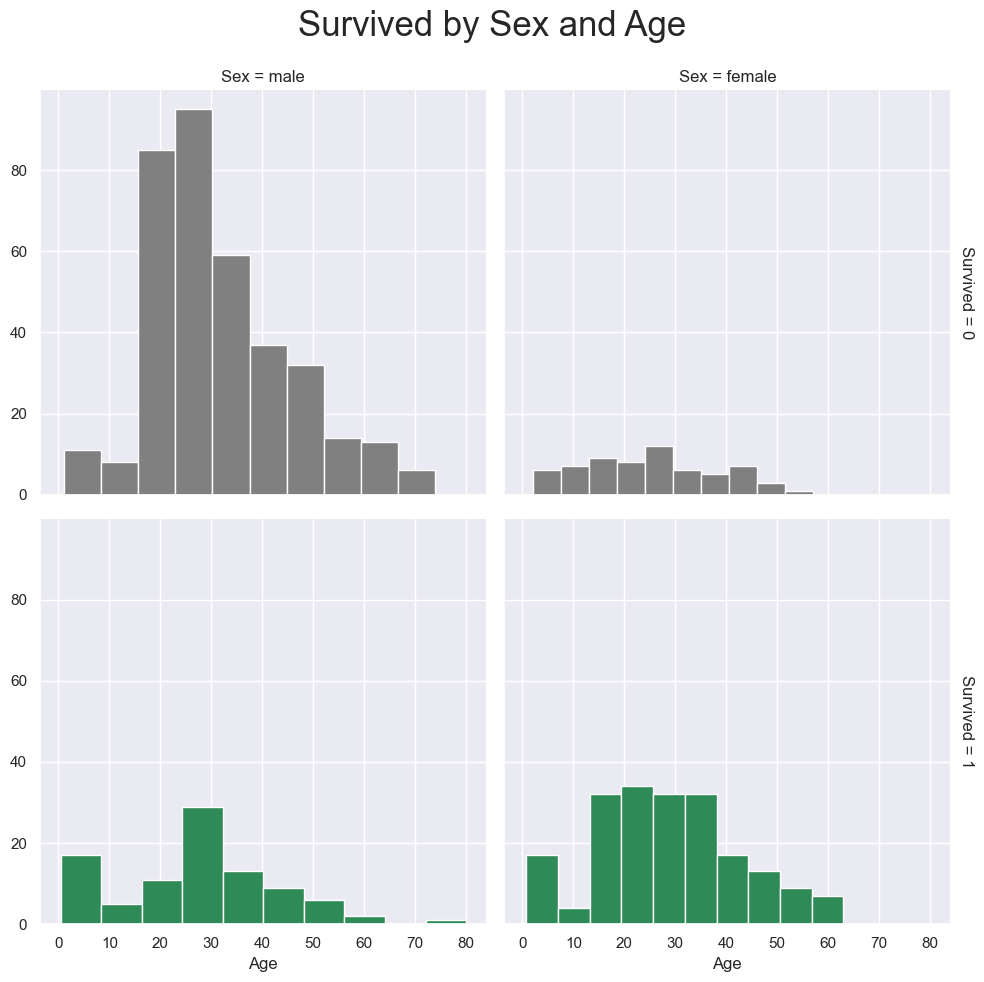

In [127]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train, height=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

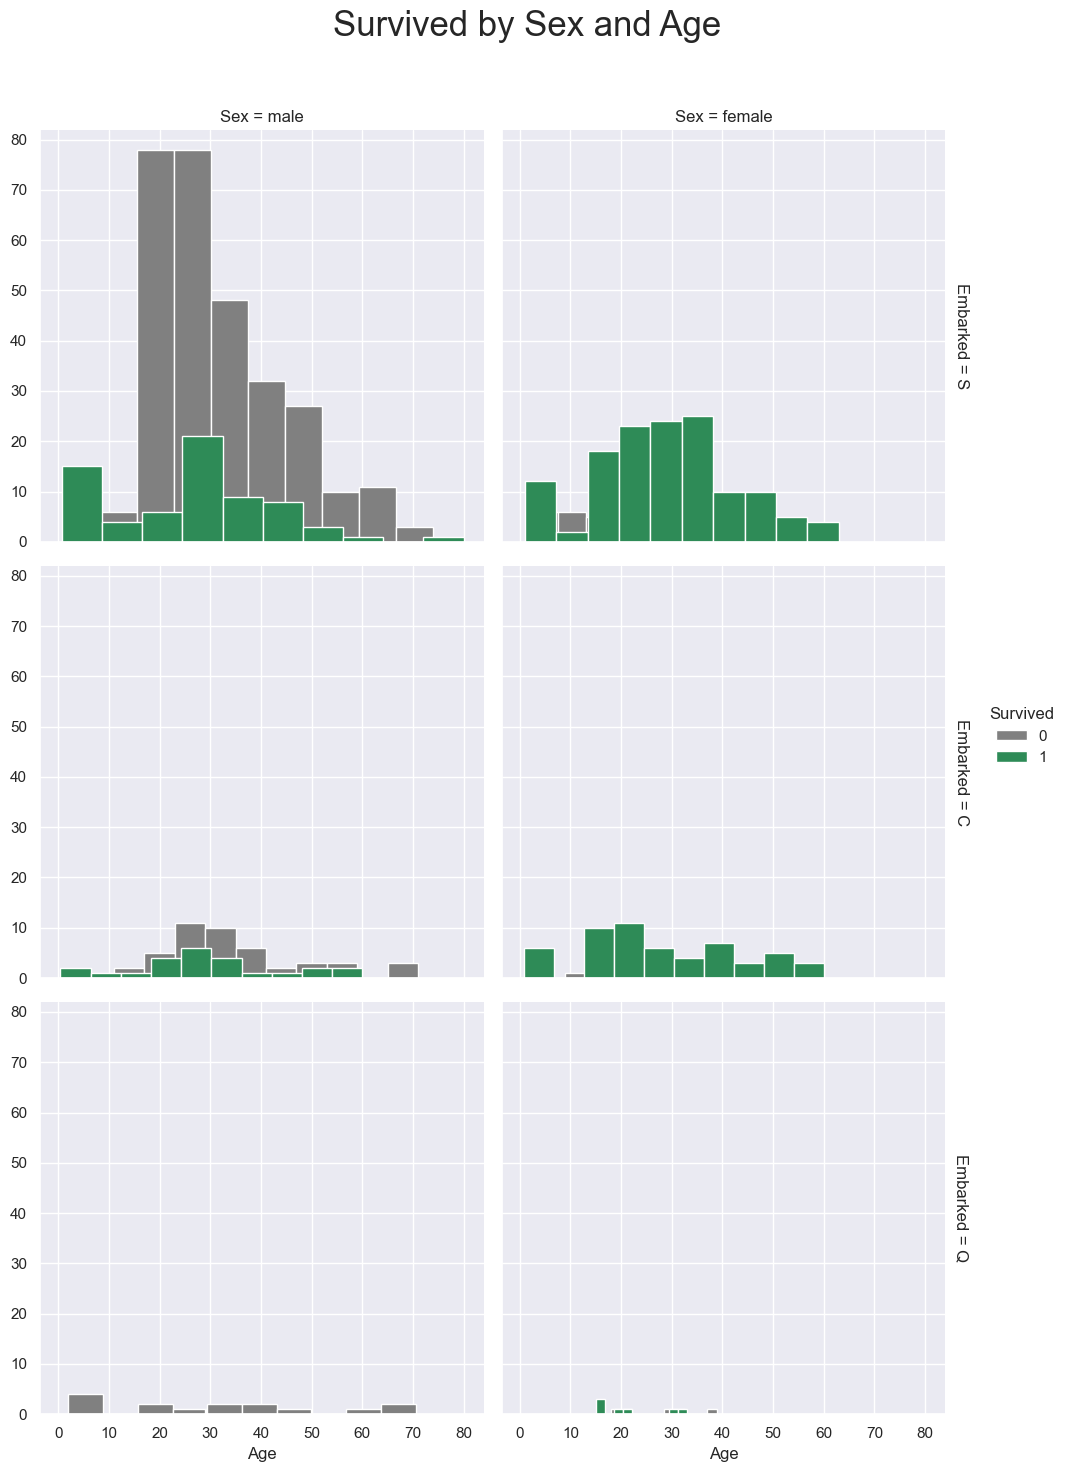

In [128]:
g = sns.FacetGrid(train,height=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

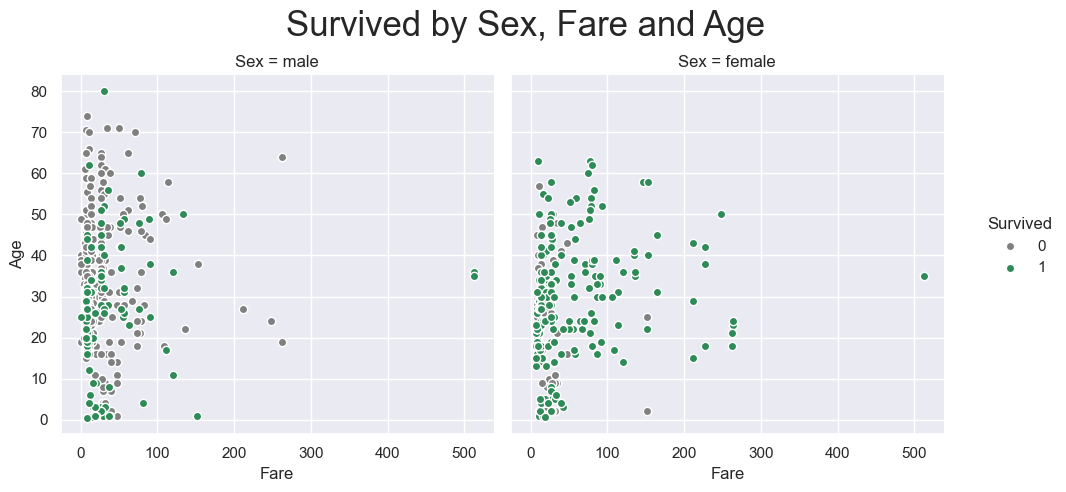

In [129]:
g = sns.FacetGrid(train, height=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

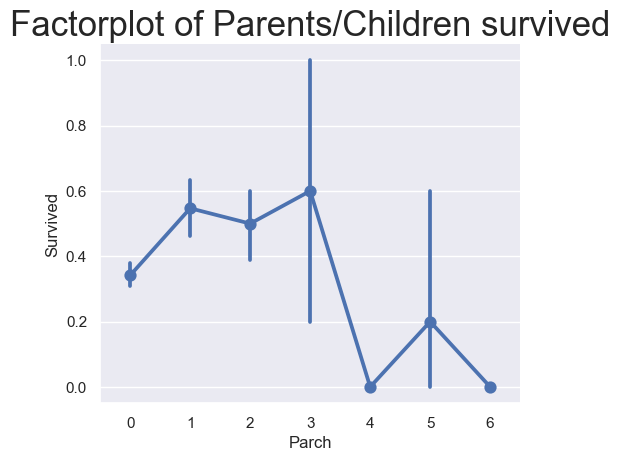

In [130]:
## dropping the three outliers where Fare is over $500 
train = train[train.Fare < 500]
## factor plot
sns.catplot(x = "Parch", y = "Survived", data = train,kind = "point")
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

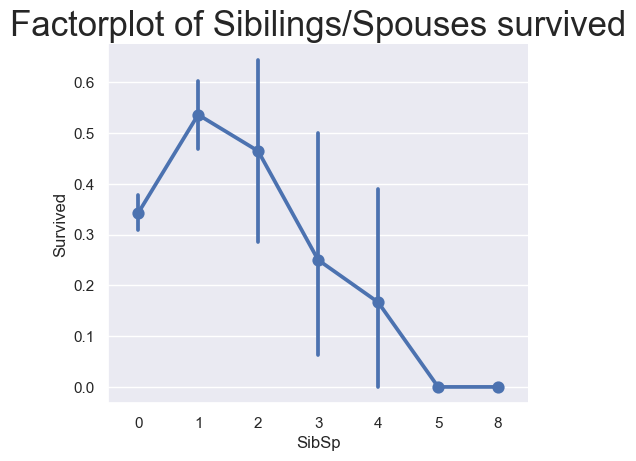

In [131]:
sns.catplot(x =  "SibSp", y = "Survived", data = train,kind = "point")
plt.title('Factorplot of Sibilings/Spouses survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

In [132]:
# Placing 0 for female and 
# 1 for male in the "Sex" column. 
train.loc[:, 'Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test.loc[:, 'Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

In [133]:
train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [134]:
train.describe(include =['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,888,888,888,888,886
unique,888,2,680,8,3
top,"Braund, Mr. Owen Harris",1,347082,G,S
freq,1,575,7,464,644


In [135]:
# Overview(Survived vs non survied)
survived_summary = train.groupby("Survived")
survived_summary.mean().reset_index()

TypeError: agg function failed [how->mean,dtype->object]

In [136]:
# Select all columns except 'Survived'
cols_to_use = train.columns.difference(['Name', 'Ticket', "Embarked"])

# Calculate the correlation matrix for the selected columns
corr_matrix = train[cols_to_use].corr()

sorted_corr = pd.DataFrame(abs(corr_matrix['Name', 'Ticket', "Embarked"]), index=cols_to_use, columns=['Correlation']).sort_values(by='Correlation', ascending=False)


ValueError: could not convert string to float: 'G'

In [137]:
## get the most important variables. 
corr = train.corr()**2
corr.Survived.sort_values(ascending=False)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [138]:
male_mean = train[train['Sex'] == 1].Survived.mean()

female_mean = train[train['Sex'] == 0].Survived.mean()
print ("Male survival mean: " + str(male_mean))
print ("female survival mean: " + str(female_mean))

print ("The mean difference between male and female survival rate: " + str(female_mean - male_mean))

Male survival mean: 0.18608695652173912
female survival mean: 0.7412140575079872
The mean difference between male and female survival rate: 0.5551271009862481


In [139]:
# Creating a new colomn with a 
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'good'
    else:
        a = 'long'
    return a


train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

## Here "map" is python's built-in function. 
## "map" function basically takes a function and 
## returns an iterable list/tuple or in this case series. 
## However,"map" can also be used like map(function) e.g. map(name_length_group) 
## or map(function, iterable{list, tuple}) e.g. map(name_length_group, train[feature]]). 
## However, here we don't need to use parameter("size") for name_length_group because when we 
## used the map function like ".map" with a series before dot, we are basically hinting that series 
## and the iterable. This is similar to .append approach in python. list.append(a) meaning applying append on list. 


## cuts the column by given bins based on the range of name_length
#group_names = ['short', 'medium', 'good', 'long']
#train['name_len_group'] = pd.cut(train['name_length'], bins = 4, labels=group_names)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\4165695669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['name_length'] = [len(i) for i in train.Name]
C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\4165695669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['name_length'] = [len(i) for i in test.Name]
C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\4165695669.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [140]:
# Creating a new colomn with a
train['name_length'] = [len(i) for i in train.Name]
# test.loc[:, 'name_length'] = [len(i) for i in test.Name]

# Create a copy of the test DataFrame
test_copy = test.copy()

# Calculate the length of each name and assign it to the 'name_length' column
test_copy.loc[:, 'name_length'] = test_copy['Name'].apply(len)

# If you need to update the original test DataFrame with the changes,
# you can do so by assigning the modified copy back to it
test = test_copy


def name_length_group(size):
    a = ''
    if (size <= 20):
        a = 'short'
    elif (size <= 35):
        a = 'medium'
    elif (size <= 45):
        a = 'good'
    else:
        a = 'long'
    return a


# Create a copy of the test DataFrame
test_copy = test.copy()

# Perform the mapping and assignment on the copied DataFrame
test_copy.loc[:, 'nLength_group'] = test_copy['name_length'].map(
    name_length_group)

# Now, if you need to update the original test DataFrame with the changes,
# you can do so by assigning the modified copy back to it
test = test_copy

train['nLength_group'] = train['name_length'].map(name_length_group)
# test.loc[:, 'nLength_group'] = test['name_length'].map(name_length_group)

# Here "map" is python's built-in function.
# "map" function basically takes a function and
# returns an iterable list/tuple or in this case series.
# However,"map" can also be used like map(function) e.g. map(name_length_group)
# or map(function, iterable{list, tuple}) e.g. map(name_length_group, train[feature]]).
# However, here we don't need to use parameter("size") for name_length_group because when we
# used the map function like ".map" with a series before dot, we are basically hinting that series
# and the iterable. This is similar to .append approach in python. list.append(a) meaning applying append on list.


# cuts the column by given bins based on the range of name_length
# group_names = ['short', 'medium', 'good', 'long']
# train['name_len_group'] = pd.cut(train['name_length'], bins = 4, labels=group_names)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\2705388656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['name_length'] = [len(i) for i in train.Name]
C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\2705388656.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['nLength_group'] = train['name_length'].map(name_length_group)


In [142]:
print(train.title.unique())

AttributeError: 'DataFrame' object has no attribute 'title'

In [143]:
## get the title from the name
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]
## Whenever we split like that, there is a good change that we will end up with while space around our string values. Let's check that. 

C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\3267697427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["title"] = [i.split('.')[0] for i in train.Name]
C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\3267697427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["title"] = [i.split(',')[1] for i in train.title]


In [144]:
print(train.title.unique())

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']


In [145]:
train.title = train.title.apply(lambda x: x.strip())

C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\1845159278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.title = train.title.apply(lambda x: x.strip())


In [146]:
## We can also combile all three lines above for test set here
test['title'] = [i.split('.')[0].split(',')[1].strip() for i in test.Name]

In [147]:
def name_converted(feature):
    """
    This function helps modifying the title column
    """
    
    result = ''
    if feature in ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col', 'Rev', 'Dona', 'Dr']:
        result = 'rare'
    elif feature in ['Ms', 'Mlle']:
        result = 'Miss'
    elif feature == 'Mme':
        result = 'Mrs'
    else:
        result = feature
    return result

test.title = test.title.map(name_converted)
train.title = train.title.map(name_converted)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\277649623.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.title = train.title.map(name_converted)


In [148]:
print(train.title.unique())
print(test.title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'rare']
['Mr' 'Mrs' 'Miss' 'Master' 'rare']


In [149]:
## Family_size seems like a good feature to create
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\2048698730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['family_size'] = train.SibSp + train.Parch+1


In [150]:
## bin the family size. 
def family_group(size):
    """
    This funciton groups(loner, small, large) family based on family size
    """
    
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [151]:
## apply the family_group function in family_size
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\1952283320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['family_group'] = train['family_size'].map(family_group)


In [152]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\2418946684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]


In [153]:
train.Ticket.value_counts().sample(10)

Ticket
11755            1
28403            2
SC/PARIS 2149    1
110813           1
PC 17477         2
349247           1
C.A. 33112       2
347062           1
33638            1
250647           2
Name: count, dtype: int64

In [154]:
train.drop(['Ticket'], axis=1, inplace=True)

test.drop(['Ticket'], axis=1, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\3487363259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['Ticket'], axis=1, inplace=True)


In [155]:
## Calculating fare based on family size. 
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\2199794154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['calculated_fare'] = train.Fare/train.family_size


In [156]:
def fare_group(fare):
    """
    This function creates a fare group based on the fare provided
    """
    
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

#train['fare_group'] = pd.cut(train['calculated_fare'], bins = 4, labels=groups)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\733883285.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['fare_group'] = train['calculated_fare'].map(fare_group)


In [157]:
train.drop(['PassengerId'], axis=1, inplace=True)

test.drop(['PassengerId'], axis=1, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\1058805468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['PassengerId'], axis=1, inplace=True)


In [158]:
train = pd.get_dummies(train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
test = pd.get_dummies(test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

In [159]:
train.head()

,Sex,Age,SibSp,Parch,Survived,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,...,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,1,22.0,1,0,0,0,3.62500,False,False,True,...,True,False,False,False,True,True,False,False,False,False
1,0,38.0,1,0,1,0,35.64165,False,False,False,...,False,False,False,False,True,False,True,False,False,False
2,0,26.0,0,0,1,1,7.92500,False,True,False,...,True,False,False,True,False,False,False,True,False,False
3,0,35.0,1,0,1,0,26.55000,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,1,35.0,0,0,0,1,8.05000,False,False,True,...,True,False,False,True,False,False,False,True,False,False


In [160]:
## rearranging the columns so that I can easily use the dataframe to predict the missing age values. 
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

In [161]:
train.head()

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,...,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,0,22.0,1,1,0,0,3.62500,False,False,True,...,True,False,False,False,True,True,False,False,False,False
1,1,38.0,0,1,0,0,35.64165,False,False,False,...,False,False,False,False,True,False,True,False,False,False
2,1,26.0,0,0,0,1,7.92500,False,True,False,...,True,False,False,True,False,False,False,True,False,False
3,1,35.0,0,1,0,0,26.55000,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,0,35.0,1,0,0,1,8.05000,False,False,True,...,True,False,False,True,False,False,False,True,False,False


In [162]:
## Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df):
    ## gettting all the features except survived
    age_df = df.loc[:,"Age":] 
    
    temp_train = age_df.loc[age_df.Age.notnull()] ## df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] ## df without age values
    
    y = temp_train.Age.values ## setting target variables(age) in y 
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    

    return df

## Implementing the completing_age function in both train and test dataset. 
completing_age(train)
completing_age(test);

c:\Users\Admin\Documents\Programming\Machine-Learning-and-Data-Mining-group-project\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Admin\Documents\Programming\Machine-Learning-and-Data-Mining-group-project\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


C:\Users\Admin\AppData\Local\Temp\ipykernel_24300\1728279640.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Age, bins = 100, kde = True, rug = False, norm_hist=False);


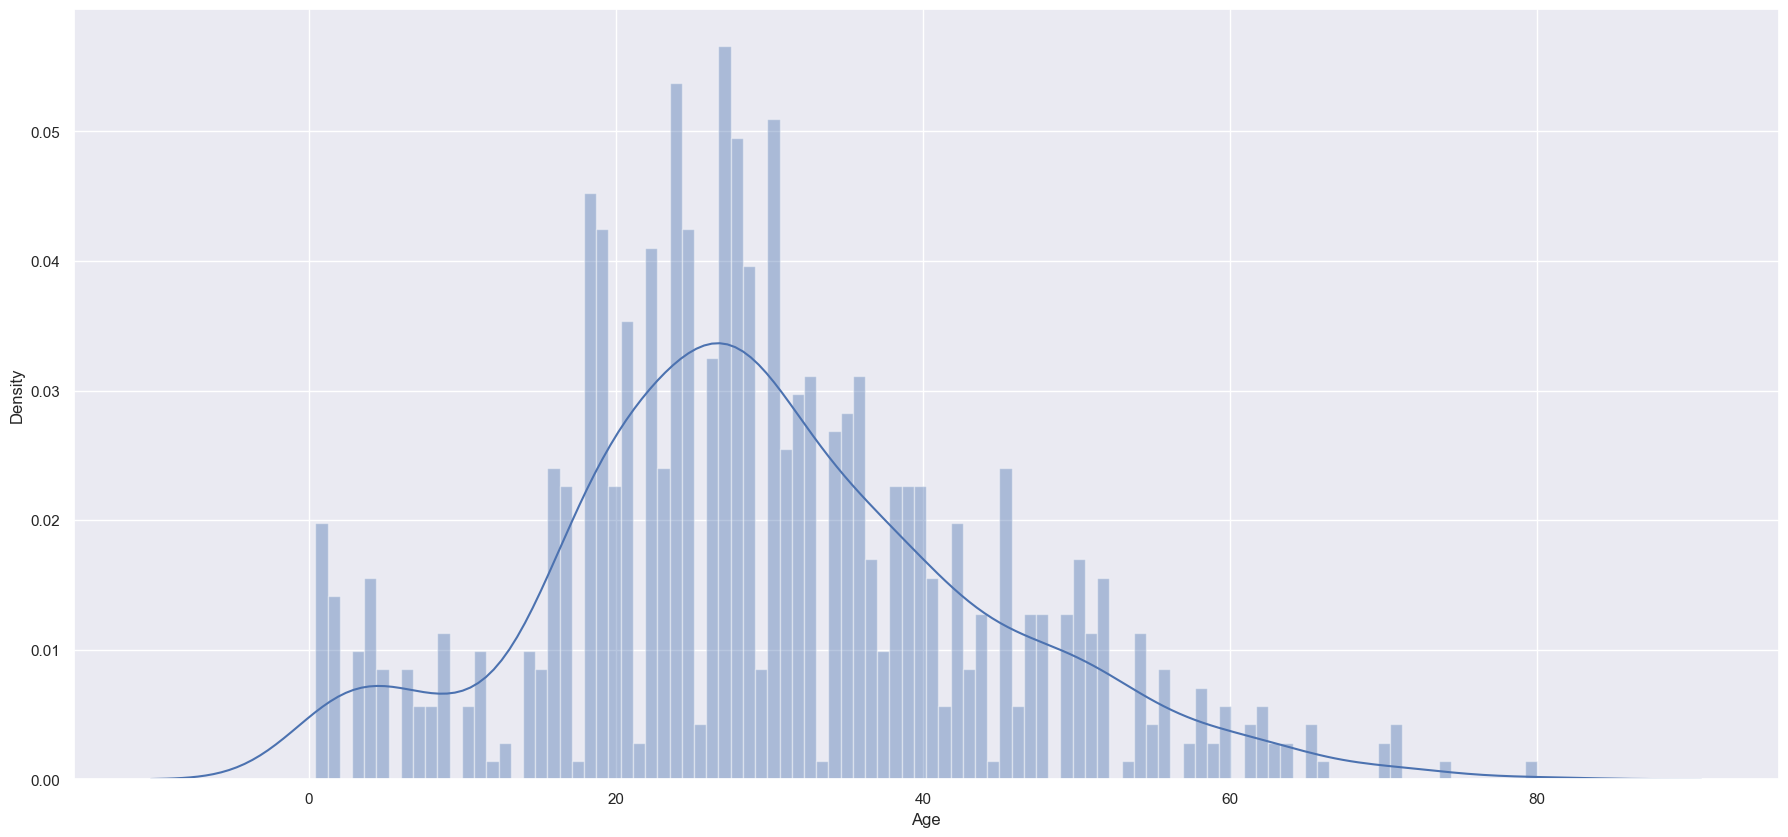

In [163]:
## Let's look at the his
plt.subplots(figsize = (22,10),)
sns.distplot(train.Age, bins = 100, kde = True, rug = False, norm_hist=False);

In [164]:
## create bins for age
def age_group_fun(age):
    """
    This function creates a bin for age
    """
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        
## Applying "age_group_fun" function to the "Age" column.
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

## Creating dummies for "age_group" feature. 
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True);

In [165]:
train.shape

(888, 46)

In [166]:
# separating our independent and dependent variable
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)


In [168]:
len(X_train)



594

In [169]:
len(X_test)

294

In [170]:
train.sample(5)

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
595,0,36.000000,1,1,1,0,8.0500,False,False,True,...,False,False,True,False,False,False,False,False,False,False
499,0,24.000000,1,0,0,1,7.7958,False,False,True,...,False,False,False,False,False,False,False,False,False,False
605,0,36.000000,1,1,0,0,7.7750,False,False,True,...,False,False,True,False,False,False,False,False,False,False
478,0,22.000000,1,0,0,1,7.5208,False,False,True,...,False,False,False,False,False,False,False,False,False,False
527,0,32.894813,1,0,0,1,221.7792,False,False,True,...,False,True,False,False,False,False,False,False,False,False


In [171]:
headers = X_train.columns 

X_train.head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
170,61.000000,1,0,0,1,33.5000,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
187,45.000000,1,0,0,1,26.5500,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
849,41.524667,0,1,0,0,44.5521,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
433,17.000000,1,0,0,1,7.1250,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
651,18.000000,0,0,1,0,11.5000,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False


In [172]:
# Feature Scaling
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()

## transforming "train_x"
X_train = st_scale.fit_transform(X_train)
## transforming "test_x"
X_test = st_scale.transform(X_test)

## transforming "The testset"
#test = st_scale.transform(test)

In [173]:
pd.DataFrame(X_train, columns=headers).head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,2.256279,0.725942,-0.464750,-0.463616,0.794901,0.554725,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.449921,-0.250224,-0.116841,-0.306468,-0.101015,5.099020,-0.286299,-0.196116
1,1.115352,0.725942,-0.464750,-0.463616,0.794901,0.292298,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,2.222611,-0.250224,-0.116841,-0.306468,-0.101015,-0.196116,-0.286299,-0.196116
2,0.867533,-1.377520,0.356862,-0.463616,-1.258018,0.972044,-0.230633,-0.521487,-1.193520,2.610707,...,-0.455321,-0.30317,2.222611,-0.250224,-0.116841,-0.306468,-0.101015,-0.196116,-0.286299,-0.196116
3,-0.881271,0.725942,-0.464750,-0.463616,0.794901,-0.441176,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.449921,-0.250224,-0.116841,-0.306468,-0.101015,-0.196116,3.492850,-0.196116
4,-0.809963,-1.377520,-0.464750,0.703282,-1.258018,-0.275979,-0.230633,1.917594,-1.193520,-0.383038,...,2.196253,-0.30317,-0.449921,-0.250224,-0.116841,-0.306468,-0.101015,-0.196116,3.492850,-0.196116


In [174]:
# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

## call on the model object
logreg = LogisticRegression(solver='lbfgs', penalty=None, random_state=42)

## fit the model with "train_x" and "train_y"
logreg.fit(X_train,y_train)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "X_test" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(X_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

In [175]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(y_test,y_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

,Predicted Not-Survived,Predicted Survived
Not-Survived,152,25
Survived,33,84


In [176]:
len(y_pred)

294

In [177]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8027210884353742

In [178]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.717948717948718

In [179]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7706422018348624

In [180]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       177
           1       0.77      0.72      0.74       117

    accuracy                           0.80       294
   macro avg       0.80      0.79      0.79       294
weighted avg       0.80      0.80      0.80       294



Confusion matrix, without normalization
[[152  25]
 [ 33  84]]
Normalized confusion matrix
[[0.86 0.14]
 [0.28 0.72]]


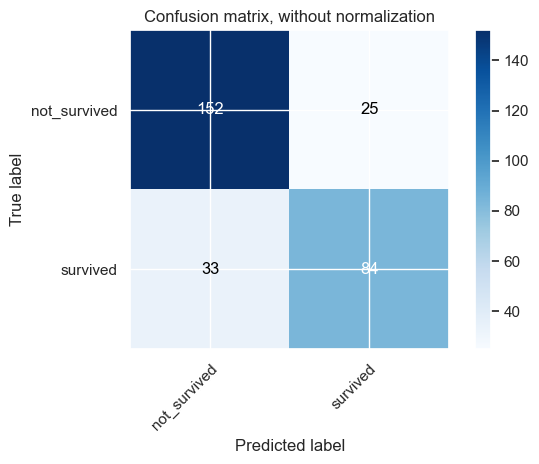

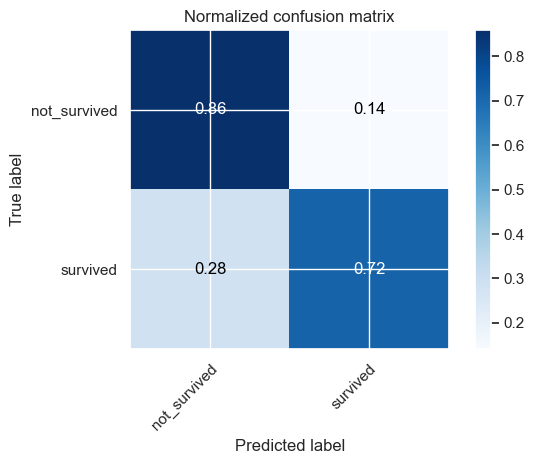

In [181]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = np.array(['not_survived','survived'])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

0.8341300883673765


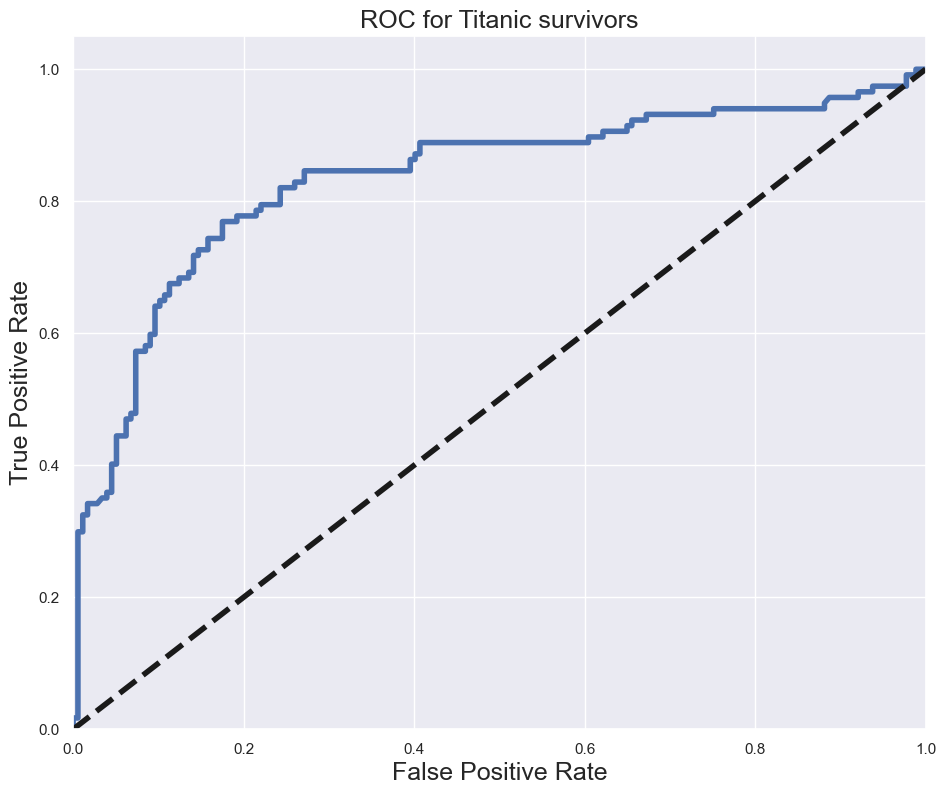

In [182]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

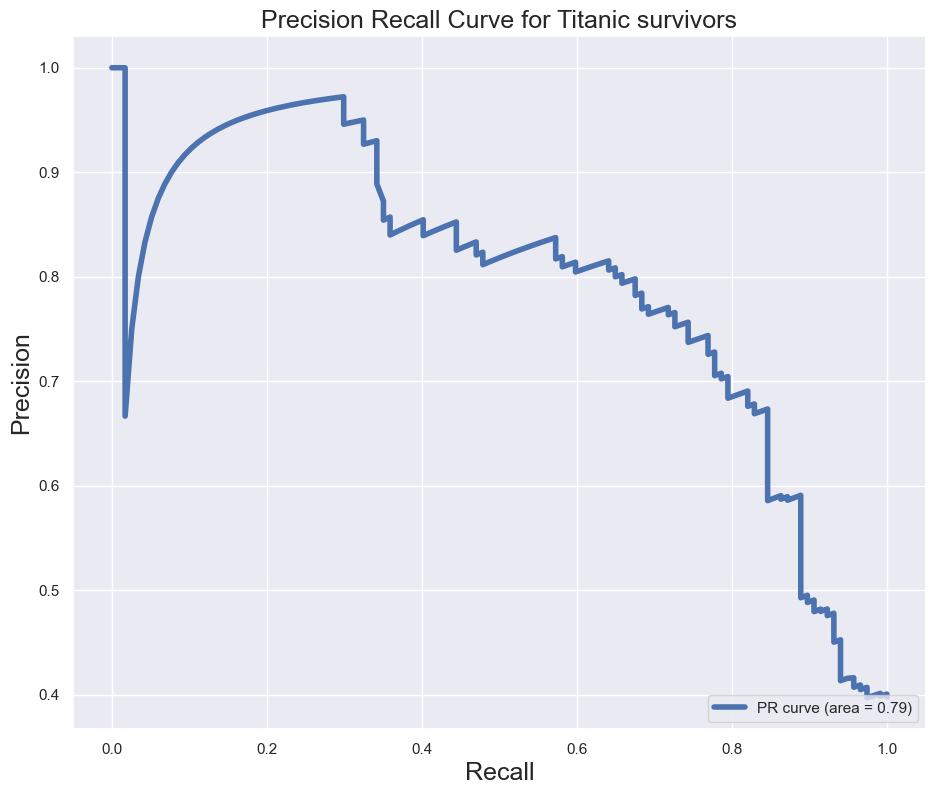

In [183]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [184]:
sc = st_scale

In [185]:
## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.

## saving the feature names for decision tree display
column_names = X.columns

X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X,y, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.82 0.85 0.81 0.85 0.83 0.83 0.8  0.86 0.82 0.82]
Mean Cross-Validation accuracy score: 0.82748


In [215]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
## C_vals is the alpla value of lasso and ridge regression(as alpha increases the model complexity decreases,)
## remember effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l2']
## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
logreg.fit(X,y)
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'penalty': ['l2']},
             scoring='accuracy')

In [216]:
print(y_pred.score())

AttributeError: 'numpy.ndarray' object has no attribute 'score'

In [189]:
logreg_grid = grid.best_estimator_

In [190]:
logreg_grid.score(X,y)

0.8412162162162162

In [191]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.8166666666666667
{'C': 2, 'penalty': 'l2'}
LogisticRegression(C=2)


In [218]:
test = test.astype(int)
# test = test.replace(True, 1)
# test = test.replace(False, 0)
test_prediction = logreg.predict(test)
submission = pd.DataFrame({
    "PassengerId": passengerid,
    "Survived": test_prediction
})

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic1_submission.csv", index=False)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [205]:

print(test)

           Age  Sex  SibSp  Parch  is_alone  calculated_fare  title_Master  \
0    34.500000    1      0      0         1         7.829200             0   
1    47.000000    0      1      0         0         3.500000             0   
2    62.000000    1      0      0         1         9.687500             0   
3    27.000000    1      0      0         1         8.662500             0   
4    22.000000    0      1      1         0         4.095833             0   
..         ...  ...    ...    ...       ...              ...           ...   
413  23.264544    1      0      0         1         8.050000             0   
414  39.000000    0      0      0         1       108.900000             0   
415  38.500000    1      0      0         1         7.250000             0   
416  23.264544    1      0      0         1         8.050000             0   
417   7.066709    1      1      1         0         7.452767             1   

     title_Miss  title_Mr  title_Mrs  ...  fare_group_mid  \
0 

In [219]:
test_prediction = logreg.predict(test)
submission = pd.DataFrame({
    "PassengerId": passengerid,
    "Survived": test_prediction
})

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic1_submission.csv", index=False)

c:\Users\Admin\Documents\Programming\Machine-Learning-and-Data-Mining-group-project\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [208]:
modified_list = [0 if element is False else element for element in test]
print(modified_list)

['Age', 'Sex', 'SibSp', 'Parch', 'is_alone', 'calculated_fare', 'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_rare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'nLength_group_good', 'nLength_group_long', 'nLength_group_medium', 'nLength_group_short', 'family_group_large', 'family_group_loner', 'family_group_small', 'fare_group_Very_low', 'fare_group_high', 'fare_group_low', 'fare_group_mid', 'fare_group_very_high', 'age_group_adult', 'age_group_child', 'age_group_infant', 'age_group_middle_aged', 'age_group_old', 'age_group_senior_citizen', 'age_group_teenager', 'age_group_toddler']


In [209]:
test = test.astype(int)
test_prediction = logreg.predict(test)
submission = pd.DataFrame({
    "PassengerId": passengerid,
    "Survived": test_prediction
})

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic1_submission.csv", index=False)

test.to_csv("temp.csv", index=False)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer